In [1]:
import pandas as pd

In [2]:
reading_json = pd.read_json("Sample Data.txt" , lines = True)

In [3]:
reading_json.to_csv("Sentimental_data.csv" , index = None)

In [4]:
df = pd.read_csv("Sentimental_data.csv")

In [5]:
df.isna().sum()

_type                  0
url                    0
date                   0
content                0
renderedContent        0
id                     0
user                   0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
outlinks            3588
tcooutlinks         3588
media               2224
retweetedTweet      5642
quotedTweet         5424
inReplyToTweetId    5373
inReplyToUser       5373
mentionedUsers      4630
coordinates         5020
place               5020
hashtags               0
cashtags            5627
dtype: int64

In [6]:
df.isna().sum().sum()

51509

# Preprocessing

### Removing stopwords

In [7]:
import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['content'] = df['content'].apply(lambda text: cleaning_stopwords(text))
df['content'].head()

0    ⭐ THANK YOU ⭐ Our popular #Sunday night pub qu...
1    Ahhh big stars #gayweho #redressparty #mickysw...
2    Without God week would SINDAY MOURNDAY TEARSDA...
3    #awesome #Attitude #Motivation #commitment #Su...
4    @BadalonaCC #Sunday training @omaree02 @Cricke...
Name: content, dtype: object

In [9]:
df['content']=df['content'].str.lower()
df['content'].head()

0    ⭐ thank you ⭐ our popular #sunday night pub qu...
1    ahhh big stars #gayweho #redressparty #mickysw...
2    without god week would sinday mournday tearsda...
3    #awesome #attitude #motivation #commitment #su...
4    @badalonacc #sunday training @omaree02 @cricke...
Name: content, dtype: object

In [10]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['content']= df['content'].apply(lambda x: cleaning_punctuations(x))
df['content'].head()

0    ⭐ thank you ⭐ our popular sunday night pub qui...
1    ahhh big stars gayweho redressparty mickysweho...
2    without god week would sinday mournday tearsda...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training omaree02 cricketpun...
Name: content, dtype: object

In [11]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['content'] = df['content'].apply(lambda x: cleaning_repeating_char(x))
df['content'].head()

0    ⭐ thank you ⭐ our popular sunday night pub qui...
1    ahhh big stars gayweho redressparty mickysweho...
2    without god week would sinday mournday tearsda...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training omaree02 cricketpun...
Name: content, dtype: object

In [12]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['content'] = df['content'].apply(lambda x: cleaning_URLs(x))
df['content'].head()

0    ⭐ thank you ⭐ our popular sunday night pub qui...
1    ahhh big stars gayweho redressparty mickysweho...
2    without god week would sinday mournday tearsda...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training omaree02 cricketpun...
Name: content, dtype: object

In [13]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', ' ', data)
df['content'] = df['content'].apply(lambda x: cleaning_numbers(x))
df['content'].head()

0    ⭐ thank you ⭐ our popular sunday night pub qui...
1    ahhh big stars gayweho redressparty mickysweho...
2    without god week would sinday mournday tearsda...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training omaree  cricketpunt...
Name: content, dtype: object

In [14]:
def transform_text(text):
    return ' '.join([word for word in text.split() if len(word) > 2])
df['content'] = df['content'].apply(lambda x: transform_text(x))
df['content']

0       thank you our popular sunday night pub quizzes...
1       ahhh big stars gayweho redressparty mickysweho...
2       without god week would sinday mournday tearsda...
3       awesome attitude motivation commitment sunday ...
4       badalonacc sunday training omaree cricketpuntc...
                              ...                        
5637    open space heart within being like cup🤲i allow...
5638    linda caminata por salud placer openair health...
5639    realkarlbeattie yfielding marymbeattie myheroe...
5640    white tea rose bushes front yard these durable...
5641    last boat ride summer store boat winter always...
Name: content, Length: 5642, dtype: object

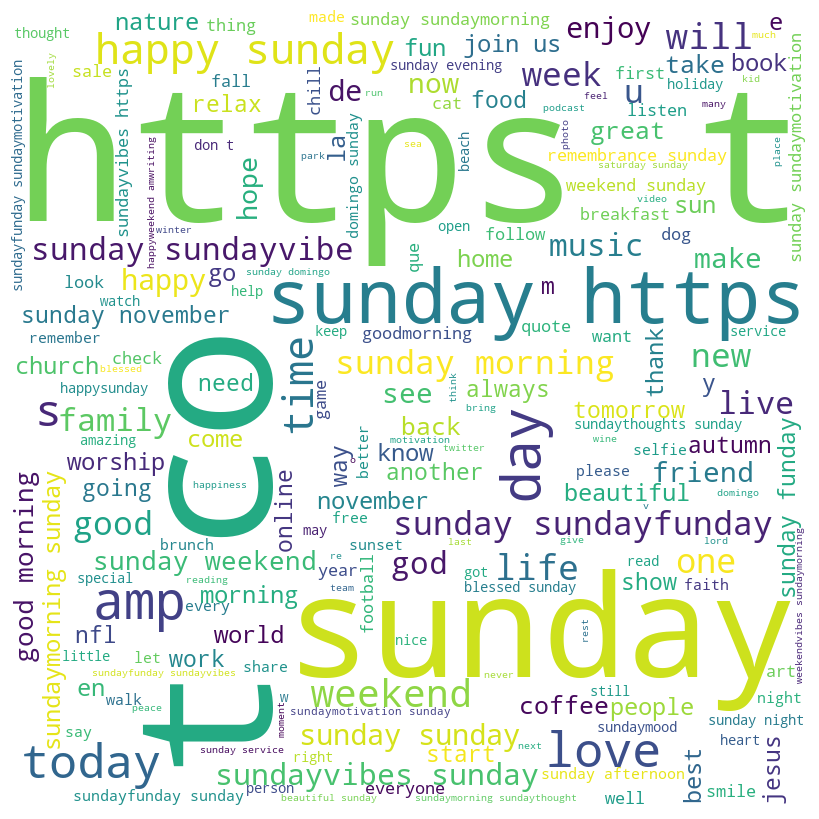

In [15]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"Sentimental_data.csv")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.content:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [16]:
def transform_text(text):
    return ' '.join([word for word in text.split() if len(word) > 2])
df['content'] = df['content'].apply(lambda x: transform_text(x))
df['content']
from textblob import TextBlob

In [17]:
def polarity_ofthe_sentiment(text):
    return TextBlob(text).sentiment.polarity

def subjectivity(text):
    res = TextBlob(text)
    return res.sentiment.subjectivity

df['Polarity'] = df['content'].apply(polarity_ofthe_sentiment)
df["subjectivity"] = df['content'].apply(subjectivity)
df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Polarity,subjectivity
0,snscrape.modules.twitter.Tweet,https://twitter.com/theworkingboat/status/1460...,2021-11-16 09:54:20+00:00,THANK YOU Our popular #Sunday night pub quizze...,⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,1460546769096425476,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['Sunday', 'TheWorkingBoat', 'Falmouth']",NaN,0.385714,0.464286
1,snscrape.modules.twitter.Tweet,https://twitter.com/WeHoLove/status/1460523193...,2021-11-16 08:20:39+00:00,Ahhh big stars #gayweho #redressparty #mickysw...,Ahhh big stars in #gayweho #redressparty #mick...,1460523193395933188,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,"['gayweho', 'redressparty', 'mickysweho', 'Sun...",NaN,0.000000,0.100000
2,snscrape.modules.twitter.Tweet,https://twitter.com/bdsrated/status/1460518587...,2021-11-16 08:02:21+00:00,Without God our week would SINDAY MOURNDAY TEA...,Without God\nour week would be\nSINDAY\nMOURND...,1460518587639025673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['CHURCH', 'SUNDAY', 'BDMS', 'SOMEWHEREINCAVIT...",NaN,-0.375000,0.625000
3,snscrape.modules.twitter.Tweet,https://twitter.com/maggietranquila/status/146...,2021-11-16 07:34:44+00:00,#awesome #Attitude #Motivation #commitment #Su...,#awesome #Attitude #Motivation #commitment #Su...,1460511638856114185,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,"['awesome', 'Attitude', 'Motivation', 'commitm...",NaN,1.000000,1.000000
4,snscrape.modules.twitter.Tweet,https://twitter.com/BadalonaCC/status/14605071...,2021-11-16 07:16:46+00:00,@BadalonaCC #Sunday training with @omaree02 @C...,@BadalonaCC #Sunday training with @omaree02\n\...,1460507115982925826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,...,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,['Sunday'],NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,snscrape.modules.twitter.Tweet,https://twitter.com/BruddaZen/status/145748830...,2021-11-07 23:21:04+00:00,"can open space heart, within being, like cup.🤲...","I can open up space in my heart, within my bei...",1457488300273405952,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,"['sundayvibes', 'SundayFunday', 'SundayThought...",NaN,0.300000,0.666667
5638,snscrape.modules.twitter.Tweet,https://twitter.com/YarnsWool/status/145748824...,2021-11-07 23:20:51+00:00,Linda caminata km) por salud placer. #openair ...,Linda caminata (8 km) por salud y placer. #ope...,1457488248528277504,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,...,NaN,NaN,NaN,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...","['openair', 'healthylife', 'walk', 'Sunday', '...",NaN,0.000000,0.000000
5639,snscrape.modules.twitter.Tweet,https://twitter.com/BringonFoxFever/status/145...,2021-11-07 23:20:26+00:00,@realkarlbeattie @Yfielding @marymbeattie #MyH...,@realkarlbeattie @Yfielding @marymbeattie #MyH...,1457488143544946692,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,0,3,...,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['MyHeroes', 'Sunday', 'animaloftheday']",NaN,0.800000,1.000000
5640,snscrape.modules.twitter.Tweet,https://twitter.com/Skye3411/status/1457487967...,2021-11-07 23:19:44+00:00,have about White Tea Rose bushes front yard. T...,I have about 20 White Tea Rose bushes in my fr...,1457487967669211145,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Flowers', 'GardeningTwitter', 'Sunda

In [18]:
import enchant
dictionary = enchant.Dict("en_US")
def perecentage_of_complex_words(text):
    words = text.split(" ")
    en_count = 0.0
    for word in words:
          if dictionary.check(word.strip()):
            en_count += 1
    percent = en_count/len(words) if len(words) != 0 else 0
    return percent*100
df["PERCENTAGE OF COMPLEX WORDS"] = df['content'].apply(perecentage_of_complex_words)

In [19]:
import re
def personal_pronoun(text):
    pronounRegex = re.compile(r'\b(I|you|he|she|it|we|they|me|him|her|us|them|(?-i:us))\b',re.I)
    pronouns = pronounRegex.findall(text)
    return pronouns
df['PERSONAL PRONOUNS'] = df['content'].apply(personal_pronoun)

In [20]:
def Analysizing(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'
    
df['analysis']=df['Polarity'].apply(Analysizing)
df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,mentionedUsers,coordinates,place,hashtags,cashtags,Polarity,subjectivity,PERCENTAGE OF COMPLEX WORDS,PERSONAL PRONOUNS,analysis
0,snscrape.modules.twitter.Tweet,https://twitter.com/theworkingboat/status/1460...,2021-11-16 09:54:20+00:00,THANK YOU Our popular #Sunday night pub quizze...,⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,1460546769096425476,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['Sunday', 'TheWorkingBoat', 'Falmouth']",NaN,0.385714,0.464286,76.923077,"[YOU, you]",positive
1,snscrape.modules.twitter.Tweet,https://twitter.com/WeHoLove/status/1460523193...,2021-11-16 08:20:39+00:00,Ahhh big stars #gayweho #redressparty #mickysw...,Ahhh big stars in #gayweho #redressparty #mick...,1460523193395933188,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,...,NaN,NaN,NaN,"['gayweho', 'redressparty', 'mickysweho', 'Sun...",NaN,0.000000,0.100000,16.666667,[],neutral
2,snscrape.modules.twitter.Tweet,https://twitter.com/bdsrated/status/1460518587...,2021-11-16 08:02:21+00:00,Without God our week would SINDAY MOURNDAY TEA...,Without God\nour week would be\nSINDAY\nMOURND...,1460518587639025673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['CHURCH', 'SUNDAY', 'BDMS', 'SOMEWHEREINCAVIT...",NaN,-0.375000,0.625000,45.454545,[],negative
3,snscrape.modules.twitter.Tweet,https://twitter.com/maggietranquila/status/146...,2021-11-16 07:34:44+00:00,#awesome #Attitude #Motivation #commitment #Su...,#awesome #Attitude #Motivation #commitment #Su...,1460511638856114185,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,"['awesome', 'Attitude', 'Motivation', 'commitm...",NaN,1.000000,1.000000,9.090909,[],positive
4,snscrape.modules.twitter.Tweet,https://twitter.com/BadalonaCC/status/14605071...,2021-11-16 07:16:46+00:00,@BadalonaCC #Sunday training with @omaree02 @C...,@BadalonaCC #Sunday training with @omaree02\n\...,1460507115982925826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,['Sunday'],NaN,0.000000,0.000000,9.090909,[],neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,snscrape.modules.twitter.Tweet,https://twitter.com/BruddaZen/status/145748830...,2021-11-07 23:21:04+00:00,"can open space heart, within being, like cup.🤲...","I can open up space in my heart, within my bei...",1457488300273405952,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,"['sundayvibes', 'SundayFunday', 'SundayThought...",NaN,0.300000,0.666667,70.967742,[I],positive
5638,snscrape.modules.twitter.Tweet,https://twitter.com/YarnsWool/status/145748824...,2021-11-07 23:20:51+00:00,Linda caminata km) por salud placer. #openair ...,Linda caminata (8 km) por salud y placer. #ope...,1457488248528277504,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,...,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...","['openair', 'healthylife', 'walk', 'Sunday', '...",NaN,0.000000,0.000000,15.384615,[],neutral
5639,snscrape.modules.twitter.Tweet,https://twitter.com/BringonFoxFever/status/145...,2021-11-07 23:20:26+00:00,@realkarlbeattie @Yfielding @marymbeattie #MyH...,@realkarlbeattie @Yfielding @marymbeattie #MyH...,1457488143544946692,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,0,3,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['MyHeroes', 'Sunday', 'animaloftheday']",NaN,0.800000,1.000000,12.500000,[],positive
5640,snscrape.modules.twitter.Tweet,https://twitter.com/Skye3411/status/1457487967...,2021-11-07 23:19:44+00:00,have about White Tea Rose bushes front yard. T...,I have about 20 White Tea Rose bushes in my fr...,1457487967669211145,"{'_type': 'snscrape.module

In [21]:
df_new = pd.DataFrame(df[['content','analysis']])
df_new

,content,analysis
0,THANK YOU Our popular #Sunday night pub quizze...,positive
1,Ahhh big stars #gayweho #redressparty #mickysw...,neutral
2,Without God our week would SINDAY MOURNDAY TEA...,negative
3,#awesome #Attitude #Motivation #commitment #Su...,positive
4,@BadalonaCC #Sunday training with @omaree02 @C...,neutral
...,...,...
5637,"can open space heart, within being, like cup.🤲...",positive
5638,Linda caminata km) por salud placer. #openair ...,neutral
5639,@realkarlbeattie @Yfielding @marymbeattie #MyH...,positive
5640,have about White Tea Rose bushes front yard. T...,positive


In [22]:
df.drop(['hashtags' , 'place' , 'cashtags' , 'coordinates' , 'retweetedTweet' , 'quotedTweet' , 'inReplyToTweetId','inReplyToUser' , 'mentionedUsers' , 'media' , 'tcooutlinks','outlinks','sourceUrl'] , axis = 1)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceLabel,Polarity,subjectivity,PERCENTAGE OF COMPLEX WORDS,PERSONAL PRONOUNS,analysis
0,snscrape.modules.twitter.Tweet,https://twitter.com/theworkingboat/status/1460...,2021-11-16 09:54:20+00:00,THANK YOU Our popular #Sunday night pub quizze...,⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,1460546769096425476,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1460546769096425476,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,0.385714,0.464286,76.923077,"[YOU, you]",positive
1,snscrape.modules.twitter.Tweet,https://twitter.com/WeHoLove/status/1460523193...,2021-11-16 08:20:39+00:00,Ahhh big stars #gayweho #redressparty #mickysw...,Ahhh big stars in #gayweho #redressparty #mick...,1460523193395933188,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,0,1460523193395933188,en,"<a href=""http://Gay-Los-Angeles.com"" rel=""nofo...",http://GayWestHollywood.com,0.000000,0.100000,16.666667,[],neutral
2,snscrape.modules.twitter.Tweet,https://twitter.com/bdsrated/status/1460518587...,2021-11-16 08:02:21+00:00,Without God our week would SINDAY MOURNDAY TEA...,Without God\nour week would be\nSINDAY\nMOURND...,1460518587639025673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1460518587639025673,en,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android,-0.375000,0.625000,45.454545,[],negative
3,snscrape.modules.twitter.Tweet,https://twitter.com/maggietranquila/status/146...,2021-11-16 07:34:44+00:00,#awesome #Attitude #Motivation #commitment #Su...,#awesome #Attitude #Motivation #commitment #Su...,1460511638856114185,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1460511638856114185,und,"<a href=""http://instagram.com"" rel=""nofollow"">...",Instagram,1.000000,1.000000,9.090909,[],positive
4,snscrape.modules.twitter.Tweet,https://twitter.com/BadalonaCC/status/14605071...,2021-11-16 07:16:46+00:00,@BadalonaCC #Sunday training with @omaree02 @C...,@BadalonaCC #Sunday training with @omaree02\n\...,1460507115982925826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,0,1460507115982925826,en,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,0.000000,0.000000,9.090909,[],neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,snscrape.modules.twitter.Tweet,https://twitter.com/BruddaZen/status/145748830...,2021-11-07 23:21:04+00:00,"can open space heart, within being, like cup.🤲...","I can open up space in my heart, within my bei...",1457488300273405952,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1457488300273405952,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,0.300000,0.666667,70.967742,[I],positive
5638,snscrape.modules.twitter.Tweet,https://twitter.com/YarnsWool/status/145748824...,2021-11-07 23:20:51+00:00,Linda caminata km) por salud placer. #openair ...,Linda caminata (8 km) por salud y placer. #ope...,1457488248528277504,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,0,1457488248528277504,es,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,0.000000,0.000000,15.384615,[],neutral
5639,snscrape.modules.twitter.Tweet,https://twitter.com/BringonFoxFever/status/145...,2021-11-07 23:20:26+00:00,@realkarlbeattie @Yfielding @marymbeattie #MyH...,@realkarlbeattie @Yfielding @marymbeattie #MyH...,1457488143544946692,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,0,3,0,1457488143544946692,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,0.800000,1.000000,12.500000,[],positive
5640,snscrape.modules.twitter.Tweet,https://twitter.com/Skye3411/status/1457487967...,2021-11-07 23:19:44+00:00,have about White Tea Rose bushes front yard. T...,I have about 20 White Tea Rose bushes in my fr...,1457487967669211145,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,

<AxesSubplot:xlabel='analysis', ylabel='count'>

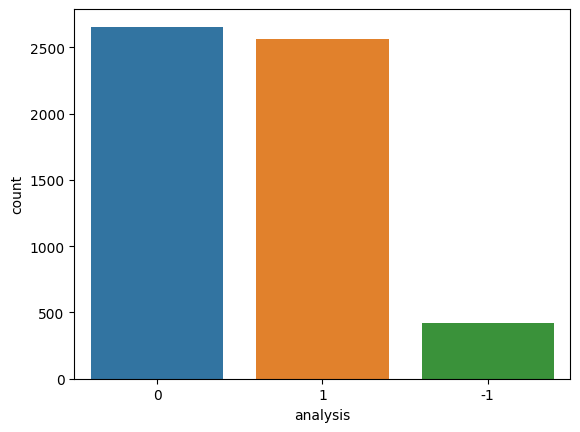

In [23]:
import seaborn as sns
df['analysis'] = df['analysis'].map({'positive':1 , 'negative':-1 , 'neutral':0} , na_action=None)
sns.countplot(data = df , x = 'analysis' , order = df['analysis'].value_counts().index)

In [24]:
df2 = df

In [25]:
def remove_tags(string):
    removelist = ""
    result = re.sub('','',string)          #remove HTML tags
    result = re.sub('https://.*','',result)   #remove URLs
    result = re.sub(r'[^w'+removelist+']', ' ',result)    #remove non-alphanumeric characters 
    result = result.lower()
    return result
df['content']=df['content'].apply(lambda cw : remove_tags(cw)) 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
df['content'] = df.content.apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [27]:
from sklearn.preprocessing import LabelEncoder
reviews = df['content'].values
labels = df['analysis'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [28]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
vec = CountVectorizer(max_features = 3000)
X = vec.fit_transform(train_sentences)
vocab = vec.get_feature_names()
X = X.toarray()
word_counts = {}
for l in range(len(X)):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X.shape[0]):
    l = train_labels[i]
    for j in range(len(vocab)):
        word_counts[l][vocab[j]] += X[i][j]

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
def laplace_smoothing(n_label_items, vocab, word_counts, word, text_label):
    a = word_counts[text_label][word] + 1
    b = n_label_items[text_label] + len(vocab)
    return math.log(a/b)

In [31]:
def group_by_label(x, y, labels):
    data = {}
    for l in labels:
        data[l] = x[np.where(y == l)]
    return data

In [32]:
def fit(x, y, labels):
    n_label_items = {}
    log_label_priors = {}
    n = len(x)
    grouped_data = group_by_label(x, y, labels)
    for l, data in grouped_data.items():
        n_label_items[l] = len(data)
        log_label_priors[l] = math.log(n_label_items[l] / n)
    return n_label_items, log_label_priors

In [33]:
def predict(n_label_items, vocab, word_counts, log_label_priors, labels, x):
    result = []
    for text in x:
        label_scores = {l: log_label_priors[l] for l in labels}
        words = set(w_tokenizer.tokenize(text))
        for word in words:
            if word not in vocab: continue
            for l in labels:
                log_w_given_l = laplace_smoothing(n_label_items, vocab, word_counts, word, l)
                label_scores[l] += log_w_given_l
        result.append(max(label_scores, key=label_scores.get))
    return result

In [34]:
import numpy as np
import math
from sklearn.metrics import accuracy_score
labels = [0,1]
n_label_items, log_label_priors = fit(train_sentences,train_labels,labels)
pred = predict(n_label_items, vocab, word_counts, log_label_priors, labels, test_sentences)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred))

Accuracy of prediction on test set :  0.47058823529411764


In [35]:
df_new

,content,analysis
0,THANK YOU Our popular #Sunday night pub quizze...,positive
1,Ahhh big stars #gayweho #redressparty #mickysw...,neutral
2,Without God our week would SINDAY MOURNDAY TEA...,negative
3,#awesome #Attitude #Motivation #commitment #Su...,positive
4,@BadalonaCC #Sunday training with @omaree02 @C...,neutral
...,...,...
5637,"can open space heart, within being, like cup.🤲...",positive
5638,Linda caminata km) por salud placer. #openair ...,neutral
5639,@realkarlbeattie @Yfielding @marymbeattie #MyH...,positive
5640,have about White Tea Rose bushes front yard. T...,positive


In [36]:
df_new.rename(columns = {'content':'text' , 'analysis':'sentiment'}, inplace = True)
df_new

,text,sentiment
0,THANK YOU Our popular #Sunday night pub quizze...,positive
1,Ahhh big stars #gayweho #redressparty #mickysw...,neutral
2,Without God our week would SINDAY MOURNDAY TEA...,negative
3,#awesome #Attitude #Motivation #commitment #Su...,positive
4,@BadalonaCC #Sunday training with @omaree02 @C...,neutral
...,...,...
5637,"can open space heart, within being, like cup.🤲...",positive
5638,Linda caminata km) por salud placer. #openair ...,neutral
5639,@realkarlbeattie @Yfielding @marymbeattie #MyH...,positive
5640,have about White Tea Rose bushes front yard. T...,positive


In [42]:
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.*?>+', '', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
   
    #removing emoji: 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   

   # removing short form: 
    
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)
    
     
    return text
    
dt = df_new['text'].apply(cleaning)

In [43]:
df_new['sentiment']

0       positive
1        neutral
2       negative
3       positive
4        neutral
          ...   
5637    positive
5638     neutral
5639    positive
5640    positive
5641    positive
Name: sentiment, Length: 5642, dtype: object

In [45]:
dt

0       thank you our popular sunday night pub quizzes...
1       ahhh big stars gayweho redressparty mickysweho...
2       without god our week would sinday mournday tea...
3       awesome attitude motivation commitment sunday ...
4       badalonacc sunday training with omaree02 crick...
                              ...                        
5637    can open space heart within being like cup🤲i c...
5638    linda caminata km por salud placer openair hea...
5639    realkarlbeattie yfielding marymbeattie myheroe...
5640    have about white tea rose bushes front yard th...
5641    last boat ride the summer before store the boa...
Name: text, Length: 5642, dtype: object

In [46]:
dt = pd.DataFrame(dt)  
dt['sentiment']=df_new['sentiment']
dt

,text,sentiment
0,thank you our popular sunday night pub quizzes...,positive
1,ahhh big stars gayweho redressparty mickysweho...,neutral
2,without god our week would sinday mournday tea...,negative
3,awesome attitude motivation commitment sunday ...,positive
4,badalonacc sunday training with omaree02 crick...,neutral
...,...,...
5637,can open space heart within being like cup🤲i c...,positive
5638,linda caminata km por salud placer openair hea...,neutral
5639,realkarlbeattie yfielding marymbeattie myheroe...,positive
5640,have about white tea rose bushes front yard th...,positive


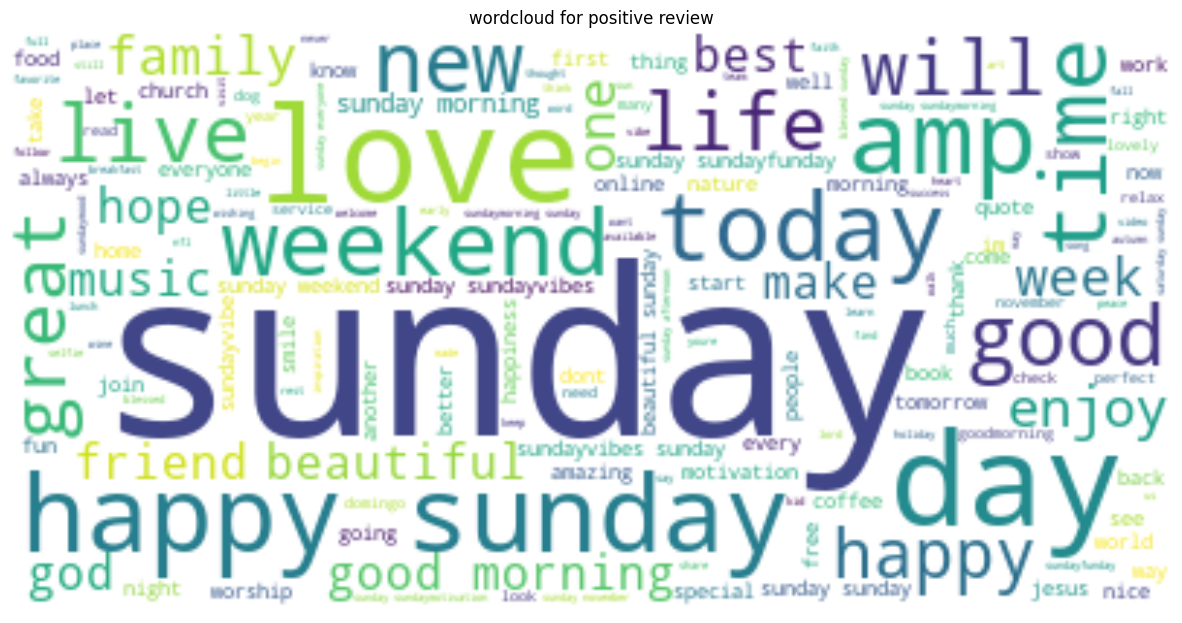

In [48]:
text = " ".join(i for i in dt[dt['sentiment']=='positive']['text'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

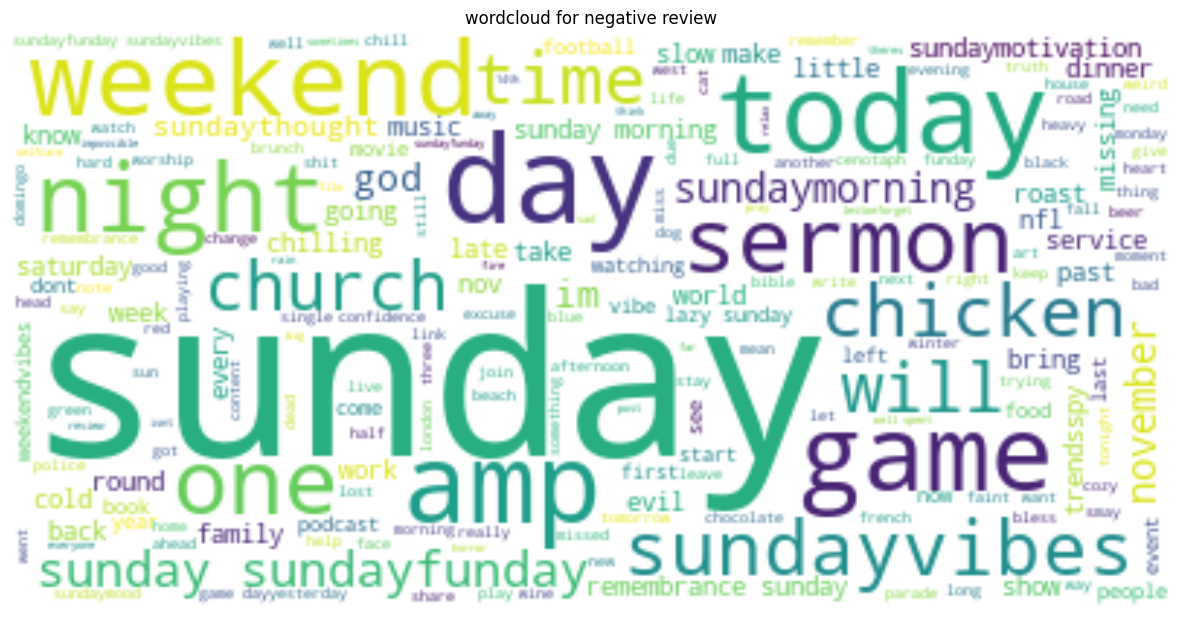

In [49]:
text = " ".join(i for i in dt[dt['sentiment']=='negative']['text'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

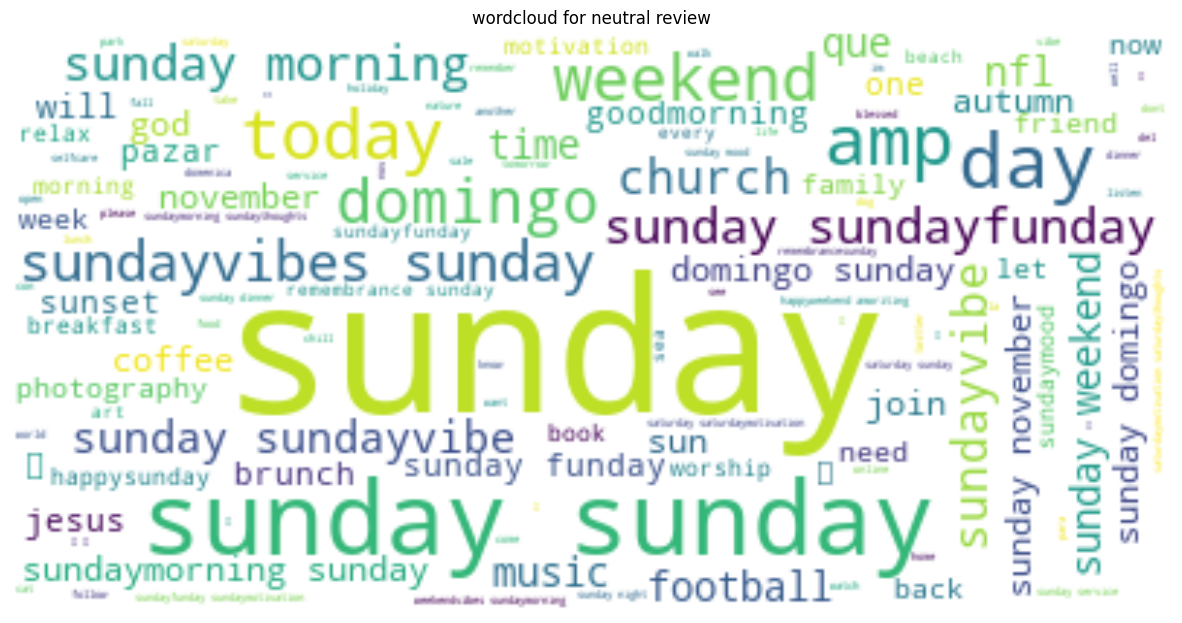

In [50]:
text = " ".join(i for i in dt[dt['sentiment']=='neutral']['text'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for neutral review')
plt.show()

In [ ]:
# remove stop word: 
dt['no_sw'] = dt['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
dt

In [ ]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

In [ ]:
import plotly.express as px

px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', 
             width=700, height=700)

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df_new[df_new['sentiment']=='positive']['text'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df_new[df_new['sentiment']=='negative']['text'].str.len())
ax2.set_title( 'Negative Reviews')

In [ ]:
fig,(ax1,ax3) = plt.subplots(2,figsize=(12,8))
ax3.hist(df_new[df_new['sentiment']=='neutral']['text'].str.len())
ax3.set_title( 'neutral Reviews')

In [ ]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))
dt.head()

In [ ]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words. 
# It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.


wordnet_lem = WordNetLemmatizer()

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)
dt

In [ ]:
# create the cleaned data for the train-test split:
nb=dt.drop(columns=['text','no_sw', 'wo_stopfreq'])
nb.columns=['sentiment','review']
nb.sentiment = [0 if each == "neutral" else -1 if each == "negative" else 1 for each in nb.sentiment]
nb

In [ ]:
tokenized_review=nb['review'].apply(lambda x: x.split())
tokenized_review.head(5)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['review'])
text_counts

In [ ]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [ ]:
'''
Using Synthetic Minority Oversampling Technique for negative sampling as negative values where very low compared to positive
and neutral
'''
from imblearn.over_sampling import SMOTE
counter = Counter(y_train)
print("before" , counter)
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train,y_train)
counter = Counter(y_train)
print("after" , counter)

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

In [ ]:
print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))